# Standard Libraries:

In [1]:
import pandas as pd
import os
from ggplot import *
import numpy as np
% matplotlib inline

# Read Data and Process:

In [2]:
data_path = 'C:/Users/VN/Documents/GitHub/Sous-vide-crockpot/data'
data_file = 'test3.csv'

In [13]:
data = pd.read_csv(os.path.join(data_path,data_file))
data['Time_minutes'] = data['TIME(sec)'] / 60.0
data['Temp_C'] = (data['INPUT(F)'] - 32) * 5.0 / 9
data['Effort'] = 100.0 * data['OUTPUT(msec)']/15000.0
data.head()

,TIME(sec),INPUT(F),OUTPUT(msec),Notes,Time_minutes,Temp_C,Effort
0,0,177.24,-85662.53,Target temperature 165F,0.000000,80.688889,-571.083533
1,16,177.01,-84087.48,full pot of water,0.266667,80.561111,-560.583200
2,32,176.79,-82512.44,Kp = 7000,0.533333,80.438889,-550.082933
3,48,176.00,-77000.00,Ki = 0,0.800000,80.000000,-513.333333
4,63,175.44,-73062.50,Kd = 0,1.050000,79.688889,-487.083333


In [4]:
data.describe()

,TIME(sec),INPUT(F),OUTPUT(msec),Time_minutes,Temp_C
count,516.000000,516.000000,516.000000,516.000000,516.000000
mean,4060.048450,163.919709,7564.707558,67.667474,73.288727
std,2350.650798,2.084627,14592.176804,39.177513,1.158126
min,0.000000,160.140000,-85662.530000,0.000000,71.188889
25%,2030.000000,163.740000,7262.540000,33.833333,73.188889
50%,4060.000000,163.850000,8050.060000,67.666667,73.250000
75%,6090.000000,163.960000,8837.480000,101.500000,73.311111
max,8120.000000,177.240000,34037.520000,135.333333,80.688889


# Results:

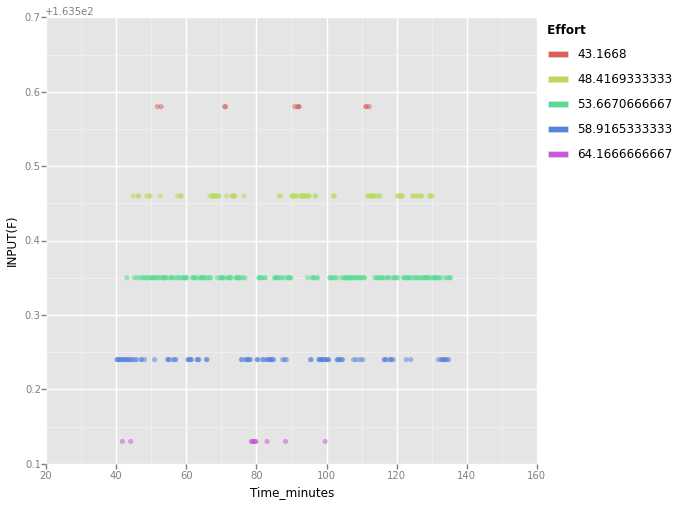

<ggplot: (24527350)>

In [18]:
ggplot(aes(x='Time_minutes', y = 'INPUT(F)', color = 'Effort'), data = data[data.Time_minutes > 40])\
+ geom_point(alpha = .5)\


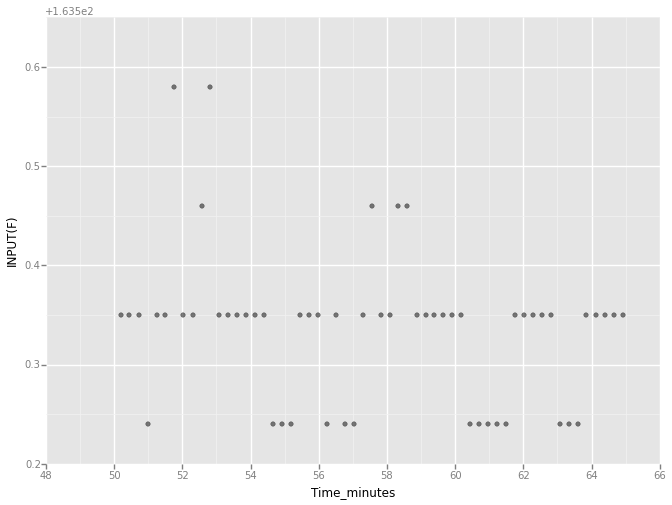

<ggplot: (28422467)>

In [9]:
ggplot(aes(x='Time_minutes', y = 'INPUT(F)'), data = data[(data.Time_minutes > 50) & (data.Time_minutes < 65)])\
+ geom_point(alpha = .5)\


In [11]:
time_diff = pd.DataFrame()
time_diff['time_diff'] = np.diff(data['TIME(sec)'])